
## Classification Using Random Forests
- Remember: Scikit-learn is organised in sublibraries (or modules):
    - The sklearn.ensemble module contains all ensembel learners
- Other 'new' imports
    - pprint is short for 'pretty printing'. Enables formatting printed items
        - pprint is useful for printing long objects for visual appeal.
        - Documentation: https://docs.python.org/3/library/pprint.html
- We will be performing a classification task using random forests: predicting in-hospital mortality

In [9]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier  

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report

- importing dataset

In [2]:
path_to_file ="/home/changhyun/workspace/ml_bioinfo_hi/topic2/septic_shock.csv"
septic_shock_data = pd.read_csv(path_to_file, encoding='utf-8')

In [3]:
septic_shock_data.head()

,age,gender,los,hospital_mortality,comorbidity_elixhauser,sofa,respiration,coagulation,liver,cardio,cns,renal
0,28,1,6.083333,0,4,2,0,0,1,0,0,1
1,79,0,7.750000,0,3,2,0,0,0,2,0,0
2,42,1,17.041667,0,11,2,0,0,0,2,0,0
3,54,1,8.125000,0,0,2,0,1,0,0,1,0
4,66,0,12.000000,0,4,2,0,0,0,2,0,0


### Classification using Random Forests: Predict Mortality
- Recall that supervised learning aims to predict the outcome for unknown cases. 
- The life cycle of a supervised learning: 
    - Select the features that will be used for prediction. We will use the features we used in KNN:
        - Age (column 0)
        - Gender (column 1)
        - comorbidity_elixhauser (column 4)
        - Overall sofa (column 5)
    - Decide on the outcome (in our case, it is hospital_mortality)
    - Split the data into training and testing sets where: 
        - The training set will be used to train the algorithm
        - The test set is assumed to contain cases with unknown outcomes.
        - We will split the 6613 cases in our dataset into:
            - 90% of the cases to be used for training
            - 10% of the cases to be used for testing
    - Evaluate the algorithm performance:
        - Compare the original outcomes in the test set with the outcomes predicted by the algorithm.
        - We can compute accuracy, sensitivity, specificity, etc....
        - Each metric needs to be imported separately (i.e. add to: from sklearn.metrics import accuracy_score, confusion_matrix above)

In [4]:
#1. Split  the data into training & testing set. 
# Instead of splitting the data manually, we can use the train_test_split function in scikit learn.
# We first have to designate the features/predictors (X) and outcomes (Y). 

X = septic_shock_data[['age','gender','comorbidity_elixhauser','sofa']]
Y = septic_shock_data[['hospital_mortality']]

#2. Call train_test_split. For more information about the parameters, look it up in the 
#scikit learn documentation here:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [5]:
#3. Create a Random Forest Classifer. Let's go with the following parameters
    #- n_estimators (number of trees) = 10000
    #- min_samples_leaf (minimum number of samples allowed per leaf node) = 100
    #- max_features (maximum number of features used to create each decision tree) = 3
    #- criterion (Splitting critera) = "entropy"
classifier = RandomForestClassifier(random_state = 42, n_estimators = 10, min_samples_leaf = 100, max_features=4)


## We can print examine the parameters used by our current forest
## Use pretty printer to have a more readable output (try normal print to see the difference)
print('Parameters currently in use:\n')
pprint(classifier.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 4,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 100,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [6]:
#4. Fit the random forest classifer to the training data: 
## Note that fit() expects an array as its second parameters. y_train is a subset of the dataframe. We convert it 
## into an array using .values.ravel()
classifier.fit(x_train, y_train.values.ravel())  

#5. Predicting the Test Set result
##Since our model is fitted to the training set, so now we can predict the test result. 
##For prediction, we will create a new prediction vector y_pred. Below is the code for it:

y_pred= classifier.predict(x_test)  

[[370  41]
 [ 89 162]]


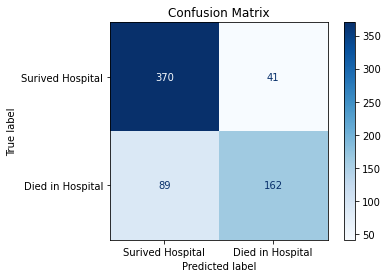

In [10]:
#6. Creating the Confusion Matrix
##Now we will create the confusion matrix to determine the correct and incorrect predictions.
##Below is the code for it:

#Creating the Confusion matrix  
cm= confusion_matrix(y_test, y_pred)  

#class_names contains the labels we would like to use. This can be ignored.
class_names  =["Surived Hospital", "Died in Hospital"]

#You can see the documentation of the plotting function here: 
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

#You can also view auto-generated examples from the scikitlearn documentation: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
disp = ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)

disp.ax_.set_title("Confusion Matrix")

print(disp.confusion_matrix)

plt.show()


In [11]:
#7. Classification report, includes accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       411
           1       0.80      0.65      0.71       251

    accuracy                           0.80       662
   macro avg       0.80      0.77      0.78       662
weighted avg       0.80      0.80      0.80       662



### Reflection
- The performance is a slight improvement over that of the decision tree. 
- We will tune this RF tomorrow!

### Visualising Feature  Importance

- Because RFs combine many trees, each of which performs classification on a subset of the features, then some features are evidently better than others in predicting the outcomes.
    - The feature importance scores 'ranks' features based on their contribution to the overall classificatio
    - Useful for 'explaining' the predictions made by the forest, since RFs are not as visually accessible as decision trees. 
    - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_

array([0.05196284, 0.00135896, 0.71138407, 0.23529413])


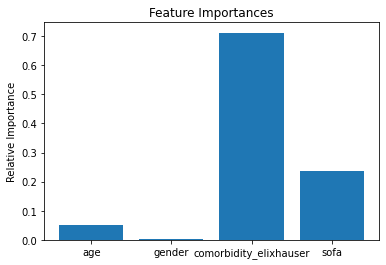

In [12]:
feature_importance_vector = classifier.feature_importances_
pprint(feature_importance_vector)

feature_names=septic_shock_data.columns[[0,1,4,5]]

plt.figure(1)
plt.title('Feature Importances')
plt.bar(range(len(feature_importance_vector)), feature_importance_vector)

plt.xticks(range(len(feature_importance_vector)), feature_names)
plt.ylabel('Relative Importance')
plt.show()

- age and gender did not have much say on the performance of the classification. 
- Let's try to re-run the classifier by making use of the other features we have (the SOFA subscores)

### Task 1: Re-running the classifier
- Re-run the training and testing blocks of this practical a few times (3-5 times). 
    - Does the performance vary accross runs?

### Task 2: Including More Features in Creating the classifier

1. Create a new random forest classifier (call it: classifier_specific) using the following:
    - Features: re-create X to include the columns: respiration, coagulation, liver, renal, cardio, cns
    - Parameters: 
        - n_estimators (number of trees) = 10000
        - criterion="entropy"
2. Why is the new classifier much slower? What does each of the parameters achieve? have the added features changed the performance? there is a discussion thread waiting for your opinion: 
    - Discussion thread title: Day 2: Reflection on Random Forest Parameters
    - Link: https://keats.kcl.ac.uk/mod/forum/discuss.php?d=262284
3. You can visualise the feature importance similarly to the above task. 
    

/tmp/ipykernel_18167/3357016196.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train)


[[416   0]
 [  0 246]]


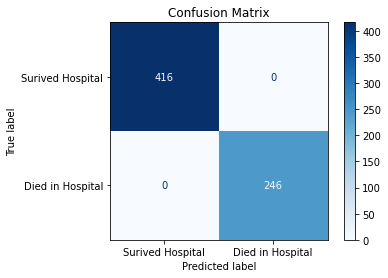

In [17]:
#### Your solution here ####
X = septic_shock_data.iloc[:,0:-1]
Y = septic_shock_data[['hospital_mortality']]

#2. Call train_test_split. For more information about the parameters, look it up in the 
#scikit learn documentation here:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

classifier = RandomForestClassifier(random_state = 42, 
                                    n_estimators = 10000, 
                                    min_samples_leaf = 100, 
                                    max_features=4, 
                                    criterion='entropy')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

cm= confusion_matrix(y_test, y_pred)  

#class_names contains the labels we would like to use. This can be ignored.
class_names  =["Surived Hospital", "Died in Hospital"]

#You can see the documentation of the plotting function here: 
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

#You can also view auto-generated examples from the scikitlearn documentation: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
disp = ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)

disp.ax_.set_title("Confusion Matrix")

print(disp.confusion_matrix)

plt.show()
